## Code

### Mount Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

### Installing Packages & Library 

In [0]:
"""
! pip install ipython
! pip install requests
! pip install bs4
! pip install html5lib
"""

'\n! pip install ipython\n! pip install requests\n! pip install bs4\n! pip install html5lib\n\n'

### Data Scraping & EDA 

#### Import Library

In [0]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
import requests
from bs4 import BeautifulSoup
from IPython.display import HTML


#sets up pandas table display
pd.set_option('display.width', 10000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)


#### Scraping Episodes of Game of Thrones 

In [0]:
url = "https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes"

In [0]:
response = requests.get(url)

In [0]:
soup = BeautifulSoup(response.text, 'html5lib')
tables = soup.find_all('table',{'class':'wikitable plainrowheaders wikiepisodetable'})
del tables[-1]
season_list = {}
ind = 0
no_overall = 0
for table in tables:
  no_overall+=1
  for row in table:
    row_data = row.find_all('tr',{'class':'vevent'})
    for single_row in row_data:
      all_columns = single_row.find_all('td');
      no_in_season = all_columns[0].text
      title = all_columns[1].text
      title = title[1:-1]
      directed_by = all_columns[2].text
      written_by = all_columns[3].text
      original_air_date = all_columns[4].text
      new_original_air_date = ""
      for ch in original_air_date:
        if ch=='(':
          break;
        else :
          new_original_air_date+=ch;
      new_original_air_date[:-1]
      viewers = all_columns[5].text
      new_viewers = ""
      for ch in viewers:
        if ch=='[':
          break;
        else :
          new_viewers+=ch;
      new_viewers[:-1]
      ind+=1
      season_list[ind] = [ind,no_overall, no_in_season, title, directed_by, written_by, new_original_air_date, new_viewers]

In [0]:
print(ind)

73


In [0]:
all_seasons = pd.DataFrame.from_dict(season_list, orient='index', columns=['ind','no_in_episode','no_in_season','title','directed_by','written_by','air_date','viewers_in_millions'])

In [0]:
all_seasons

,ind,no_in_season,no_in_episode,title,directed_by,written_by,air_date,viewers_in_millions
1,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011",2.22
2,2,1,2,The Kingsroad,Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011",2.20
3,3,1,3,Lord Snow,Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011",2.44
4,4,1,4,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,"May 8, 2011",2.45
5,5,1,5,The Wolf and the Lion,Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011",2.58
...,...,...,...,...,...,...,...,...
69,69,8,2,A Knight of the Seven Kingdoms,David Nutter,Bryan Cogman,"April 21, 2019",10.29
70,70,8,3,The Long Night,Miguel Sapochnik,David Benioff & D. B. Weiss,"April 28, 2019",12.02
71,71,8,4,The Last of the Starks,David Nutter,David Benioff & D. B. Weiss,"May 5, 2019",11.80
72,72,8,5,The Bells,Miguel Sapochnik,David Benioff & D. B. Weiss,"May 12, 2019",12.48


#### Creating CSV File

In [0]:
import os
from pathlib import Path
path = Path(os.getcwd())
all_seasons.to_csv(path/'drive'/'My Drive'/'Colab Notebooks'/'Data Science Lab'/'game_of_thrones.csv');

#### EDA

##### Data & Color Pre Processing

In [0]:
all_seasons.dtypes

ind                     int64
no_in_season            int64
no_in_episode          object
title                  object
directed_by            object
written_by             object
air_date               object
viewers_in_millions    object
dtype: object

In [0]:
all_seasons.no_in_episode = all_seasons.no_in_episode.astype(int)
all_seasons.viewers_in_millions = all_seasons.viewers_in_millions.astype(float)

In [0]:
all_seasons.dtypes

ind                      int64
no_in_season             int64
no_in_episode            int64
title                   object
directed_by             object
written_by              object
air_date                object
viewers_in_millions    float64
dtype: object

In [0]:
# versions below 0.8.1
import seaborn.apionly as sns #sets up styles and gives us more plotting options

/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  

In [0]:
sns.set_context("notebook")

In [0]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

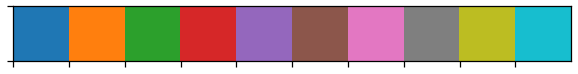

In [0]:
sns.palplot(sns.color_palette());

In [0]:
output = sns.choose_colorbrewer_palette(data_type="qualitative")

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

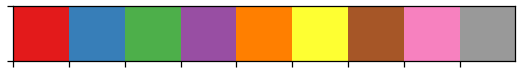

In [0]:
sns.palplot(output)

In [0]:
sns.set_palette(output)

##### Average Viewers per Season

In [0]:
av_viewers = all_seasons.groupby('no_in_season').viewers_in_millions.mean()
av_viewers

no_in_season
1     2.515000
2     3.795000
3     4.966000
4     6.846000
5     6.880000
6     7.688000
7    10.261429
8    11.993333
Name: viewers_in_millions, dtype: float64

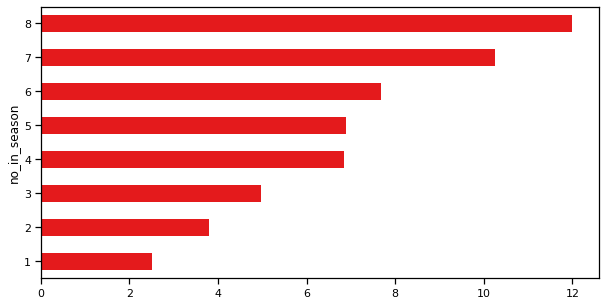

In [0]:
av_viewers.plot(kind="barh",figsize=(10,5))

In [0]:
sns.reset_defaults()

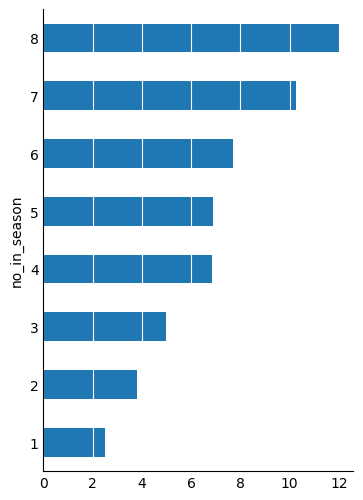

In [0]:
plt.figure(figsize=(4, 6))
ax = plt.gca()
av_viewers.plot(kind="barh")
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine()

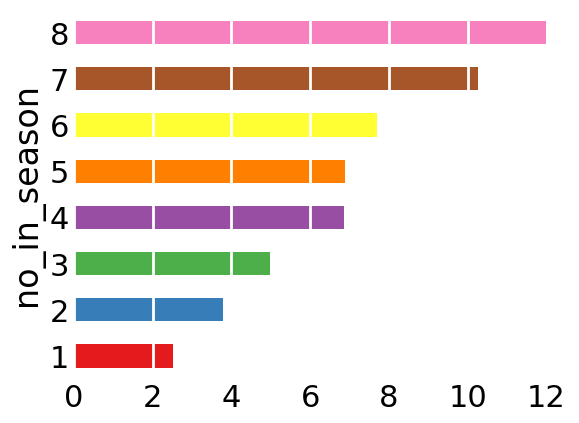

In [0]:
with sns.plotting_context("poster"):
    ax = plt.gca()
    av_viewers.plot(kind="barh",color=output)
    plt.grid(axis = 'x', color ='white', linestyle='-')
    ax.tick_params(axis='both', which='both',length=0)
    sns.despine(left=True, bottom=True)

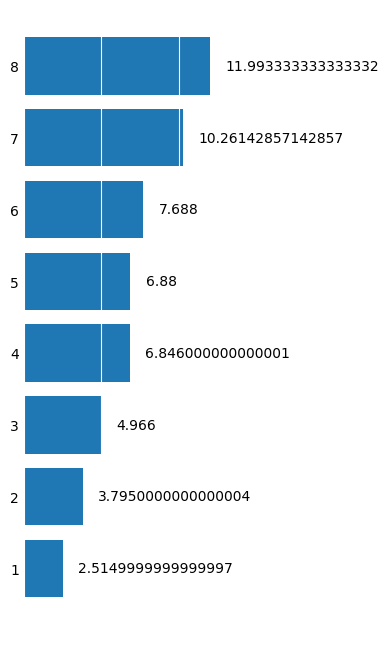

In [0]:
plt.figure(figsize=(3, 8))
ax = plt.gca()
av_viewers2 = av_viewers.sort_values()
makes = av_viewers2.index
speeds = av_viewers2.values
nums = np.arange(len(av_viewers2))
plt.barh(nums, speeds)
for p, c, ch in zip(nums, makes, speeds):
    plt.annotate(str(ch), xy=(ch + 1, p), va='center')
ticks = plt.yticks(nums, makes)
xt = plt.xticks()[0]
plt.xticks(xt, [' '] * len(xt))
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

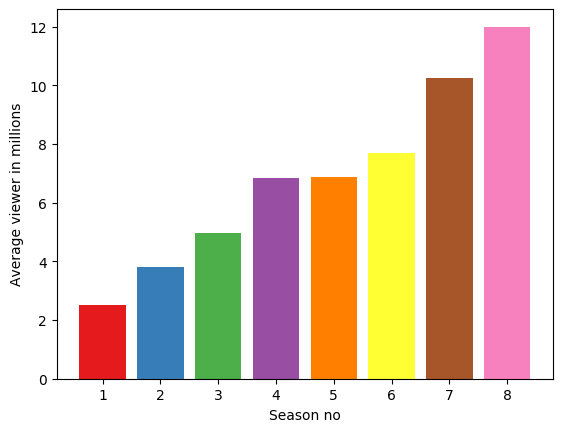

In [0]:
plt.bar(av_viewers.index,av_viewers.values, color=output)
plt.xlabel('Season no')
plt.ylabel('Average viewer in millions')
plt.show()

No handles with labels found to put in legend.


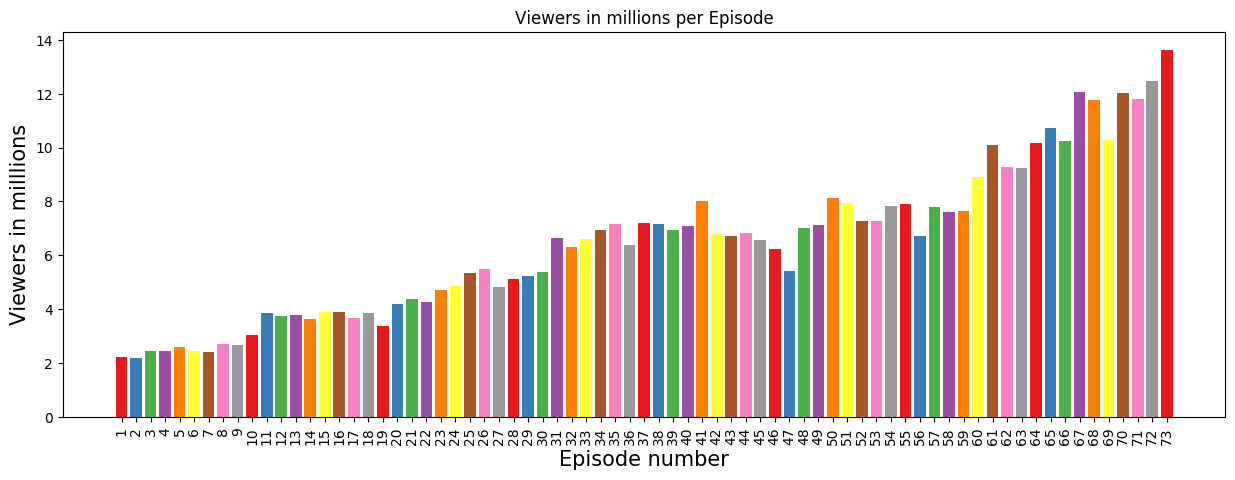

In [0]:
import matplotlib.font_manager as fm

# this is for plotting purpose
fontsize2use = 10

fig = plt.figure(figsize=(15,5))
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)    
fontprop = fm.FontProperties(size=fontsize2use)
plt.bar(all_seasons.ind, all_seasons.viewers_in_millions,width=.8,color=output)
plt.xlabel('Episode number', fontsize=15)
plt.ylabel('Viewers in milllions', fontsize=15)
plt.xticks(index+1, all_seasons.ind, fontsize=10, rotation=90)
plt.title('Viewers in millions per Episode')
ax.legend(loc=1, prop=fontprop)     
plt.show()


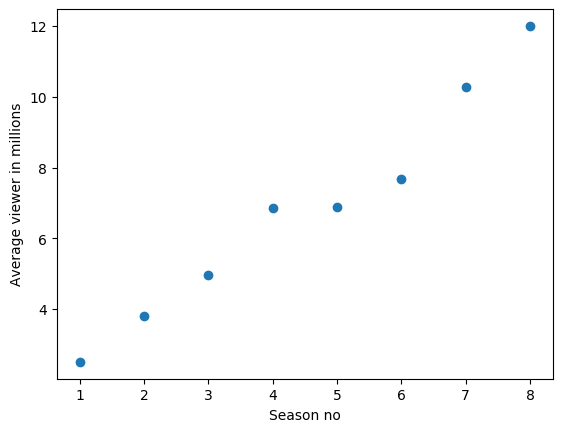

In [0]:
plt.scatter(av_viewers.index,av_viewers.values); # you could also use plot and plot data as dots, try that.
plt.xlabel('Season no')
plt.ylabel('Average viewer in millions')
plt.show()

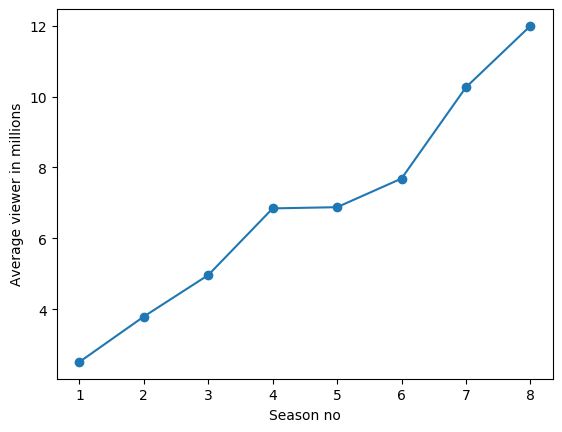

In [0]:
plt.plot(av_viewers.index,av_viewers.values,'o-'); # you could also use plot and plot data as dots, try that.
plt.xlabel('Season no')
plt.ylabel('Average viewer in millions')
plt.show()

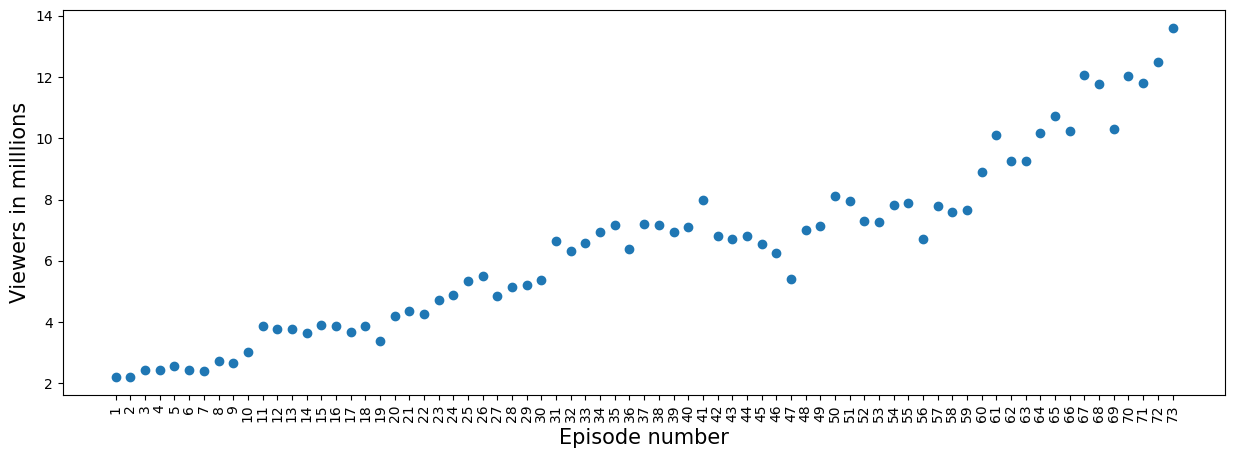

In [0]:
fontsize2use = 10

fig = plt.figure(figsize=(15,5))
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)    
fontprop = fm.FontProperties(size=fontsize2use)
plt.scatter(all_seasons.ind,all_seasons.viewers_in_millions); # you could also use plot and plot data as dots, try that.
plt.xlabel('Episode number', fontsize=15)
plt.ylabel('Viewers in milllions', fontsize=15)
plt.xticks(index+1, all_seasons.ind, fontsize=10, rotation=90)
plt.show()

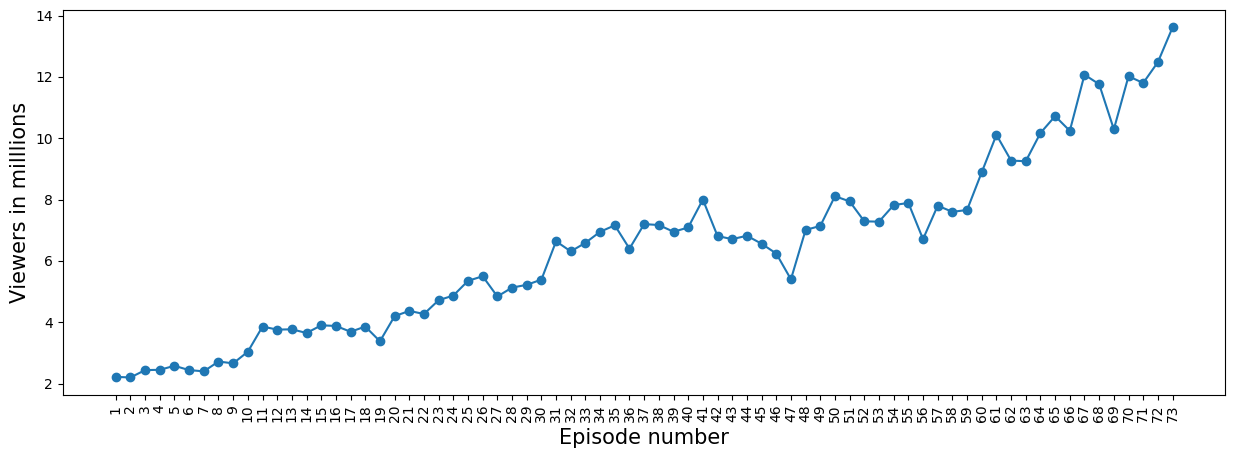

In [0]:
fontsize2use = 10

fig = plt.figure(figsize=(15,5))
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)    
fontprop = fm.FontProperties(size=fontsize2use)
plt.plot(all_seasons.ind,all_seasons.viewers_in_millions,'o-'); # you could also use plot and plot data as dots, try that.
plt.xlabel('Episode number', fontsize=15)
plt.ylabel('Viewers in milllions', fontsize=15)
plt.xticks(index+1, all_seasons.ind, fontsize=10, rotation=90)
plt.show()

**Pie Chart**

Average Viewers per Seasons


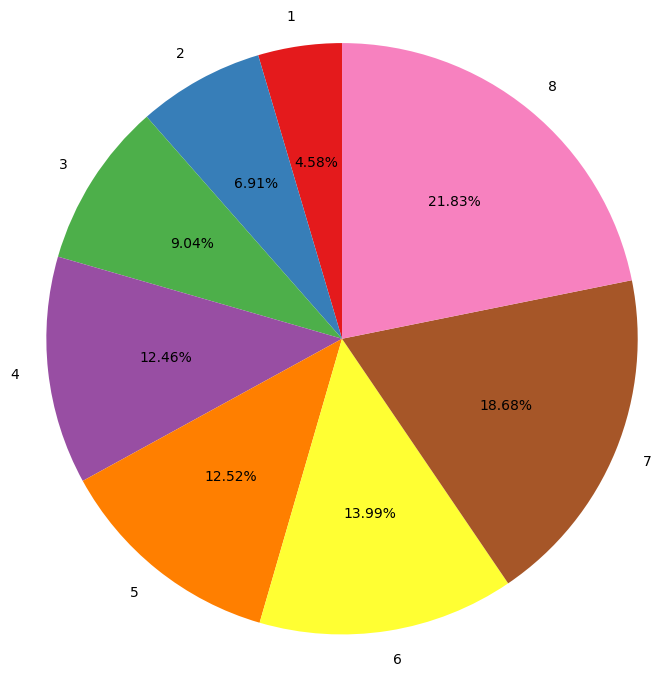

In [0]:
# pie chart - Average Viewers per Seasons
print('Average Viewers per Seasons')
plt.pie(av_viewers.values,labels=av_viewers.index,colors=output,autopct='%1.2f%%',startangle=90,radius=2)
plt.show()

##### Average Viewers per Director

In [0]:
director_avgViewers = all_seasons.groupby('directed_by').viewers_in_millions.mean()
director_avgViewers

directed_by
Alan Taylor                     4.517143
Alex Graves                     6.230000
Alik Sakharov                   5.717500
Brian Kirk                      2.490000
D. B. Weiss                     6.640000
Daniel Minahan                  3.240000
Daniel Sackheim                 7.550000
David Benioff                   4.720000
David Benioff & D. B. Weiss    13.610000
David Nutter                    7.475556
David Petrarca                  3.775000
Jack Bender                     7.300000
Jeremy Podeswa                  8.368333
Mark Mylod                      7.908333
Matt Shakman                   10.445000
Michael Slovis                  7.405000
Michelle MacLaren               6.020000
Miguel Sapochnik                8.910000
Neil Marshall                   5.165000
Tim Van Patten                  2.210000
Name: viewers_in_millions, dtype: float64

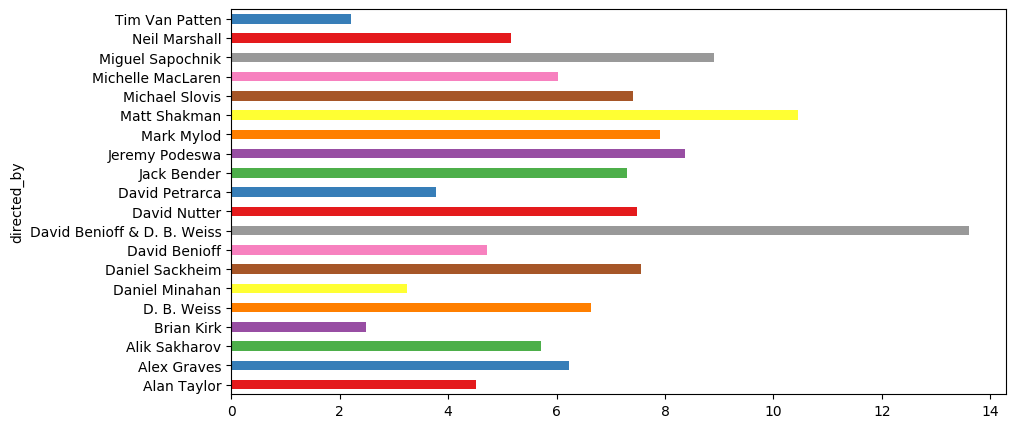

In [0]:
director_avgViewers.plot(kind="barh",figsize=(10,5),color=output)

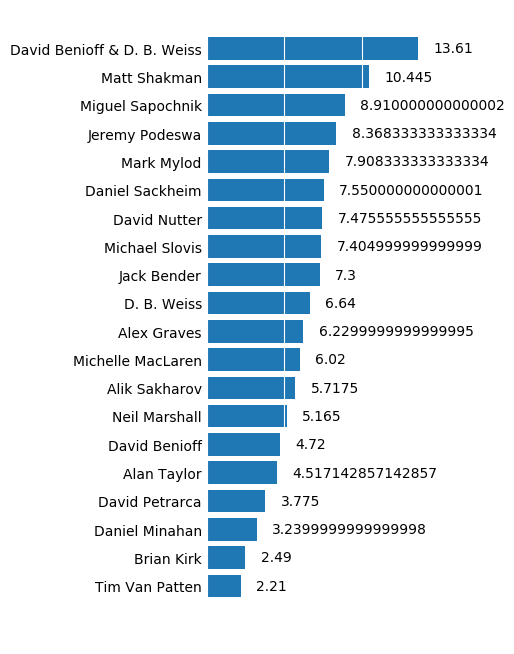

In [0]:
plt.figure(figsize=(3, 8))
ax = plt.gca()
director_avgViewers2 = director_avgViewers.sort_values()
makes = director_avgViewers2.index
speeds = director_avgViewers2.values
nums = np.arange(len(director_avgViewers2))
plt.barh(nums, speeds)
for p, c, ch in zip(nums, makes, speeds):
    plt.annotate(str(ch), xy=(ch + 1, p), va='center')
ticks = plt.yticks(nums, makes)
xt = plt.xticks()[0]
plt.xticks(xt, [' '] * len(xt))
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

**Pie Chart**

Average Viewers per Director


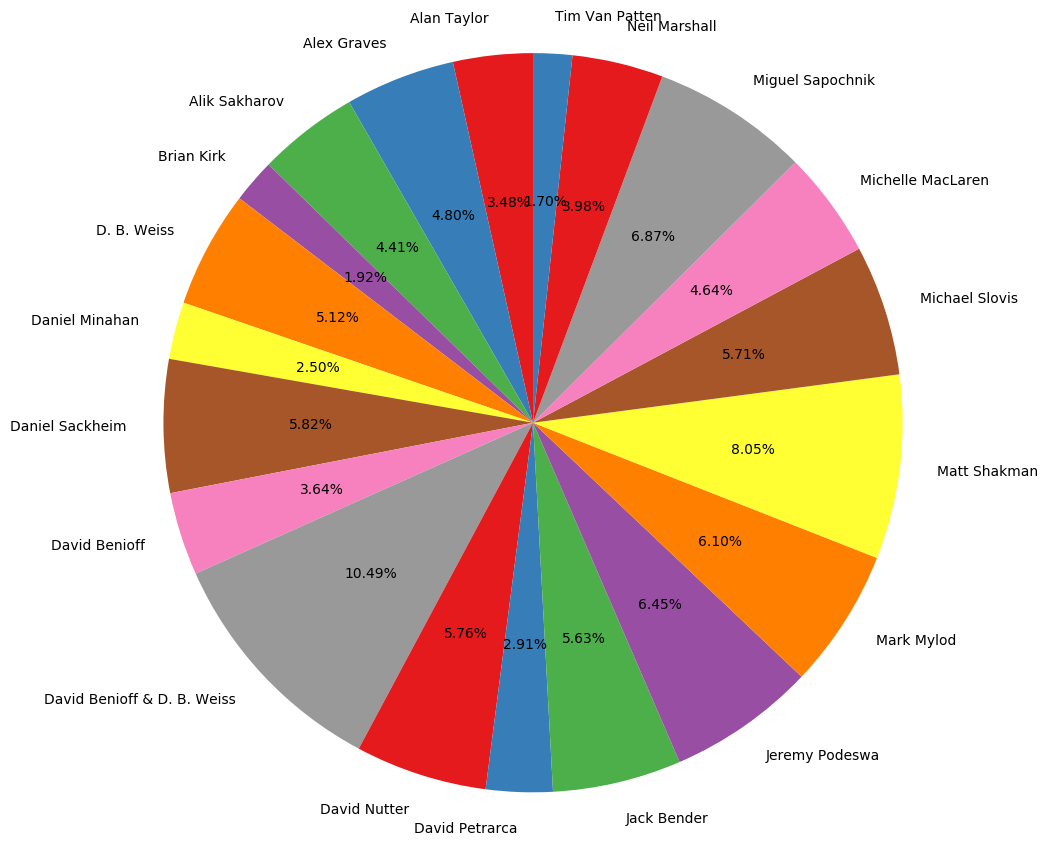

In [0]:
# pie chart - Average Viewers per Director
print('Average Viewers per Director')
plt.pie(director_avgViewers.values,labels=director_avgViewers.index,colors=output,autopct='%1.2f%%',startangle=90,radius=2.5)
plt.show()

## Story

From the Exploratory data analysis we have done on Game of Thrones we can say that:
- There are 8 seasons here.
- There are 73 episodes in all 8 seasons.
  - Season 1 has 10 episodes.
  - Season 2 has 10 episodes.
  - Season 3 has 10 episodes.
  - Season 4 has 10 episodes.
  - Season 5 has 10 episodes.
  - Season 6 has 10 episodes.
  - Season 7 has 7 episodes.
  - Season 8 has 6 episodes.

- The number of average viewers in millions of first, second, third, fourth, fifth, sixth, seventh, and eighth episodes are - 2.515000, 3.795000,4.966000,6.846000,6.880000,7.688000, 10.261429 and 11.993333.
- Season 8 has maximum number of views. The average maximum views of season 8 is 11.99 millions. The highest no of episode is 73.The name of the episode is	"The Iron Throne".
- We can see in our scrapping table, there one director direct more than one episode. David Benioff & D. B. Weiss directed maximum episodes and get the average highest views among all of them.
- We find the highest 13.61 million views in episode 6 - season 8. 
- We also see here that, Who directed an episode? How many episodes came in a year? How many million views a director has on average?
- The lowest viewest episode no is 2. The name of the episode is "The Kingsroad" which is directed by Tim Van Patten.